Step 1: Import required libraries

PROJECT NAME :FORD GO BIKE

CONTRIBUTION :INDIVIDUAL

TEAM MEMBER : Gulshan R Gaonkar

The Ford GoBike Sharing EDA (Exploratory Data Analysis) project focuses on analyzing bike-sharing data to understand user behavior, bike usage patterns, and other important insights.
We explored various factors like trip duration, user type (subscriber or customer), gender, age, and usage across different weekdays and hours.
Data cleaning was done to remove missing or incorrect values, and new columns were created like user age and trip weekday to help in deeper analysis.
Visualization techniques such as bar graphs, pie charts, and heatmaps were used to find trends — like peak usage times, popular stations, and user demographics.

github link:

Conclusion:
From the analysis, we concluded that subscribers (regular members) form the majority of users compared to customers (casual users).
Most trips happen during weekday rush hours (morning and evening), which shows that bikes are mainly used for daily commutes.
Males use the service more than females, and the majority of users are between 25-40 years old.
Trip duration is longer for customers than for subscribers.
Overall, bike-sharing is heavily influenced by working patterns, age group, and subscription type, which helps Ford GoBike plan better service, offers, and bike placements.

 Import Libraries


step 1: import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load the dataset

In [ ]:
df = pd.read_csv('/content/tripdata-ford.csv')

Step 3: Display first 5 rows of the dataset

In [ ]:
print(df.head())

   duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:58:31.0530   

   start_station_id                                 start_station_name  \
0               120                               Mission Dolores Park   
1                15  San Francisco Ferry Building (Harry Bridges Pl...   
2               304                               Jackson St at 5th St   
3                75                           Market St at Franklin St   
4                74                              Laguna St at Hayes St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.761420              -122.426435        

Step 4:Check basic info about the dataset

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

Step 5: Check for missing/null values in each column


In [ ]:
print(df.isnull().sum())


duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64


Step 6: Convert 'start_time' and 'end_time' columns to datetime format

In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


Step 7: Create a new column 'trip_duration' in minutes


In [ ]:
df['trip_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60


Step 8: Extract the hour from 'start_time'


In [ ]:
df['start_hour'] = df['start_time'].dt.hour

Step 9: Extract the day name (like Monday, Tuesday) from 'start_time'


In [ ]:
df['day_of_week'] = df['start_time'].dt.day_name()

Step 10: Plot distribution of trip duration (bar-like histogram)


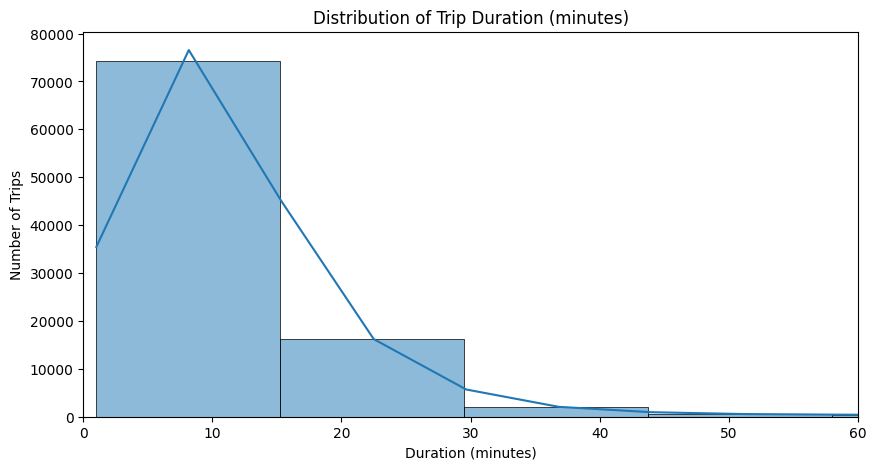

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['trip_duration'], bins=100, kde=True)
plt.xlim(0, 60)  # Limiting to 60 minutes for better visualization
plt.title('Distribution of Trip Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Trips')
plt.show()

Step 11: Count of user types (like Subscriber or Customer)


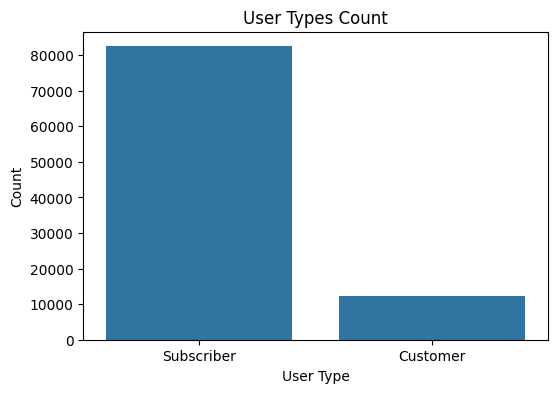

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='user_type', data=df)
plt.title('User Types Count')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

Step 12: Pie chart of gender (if column exists)


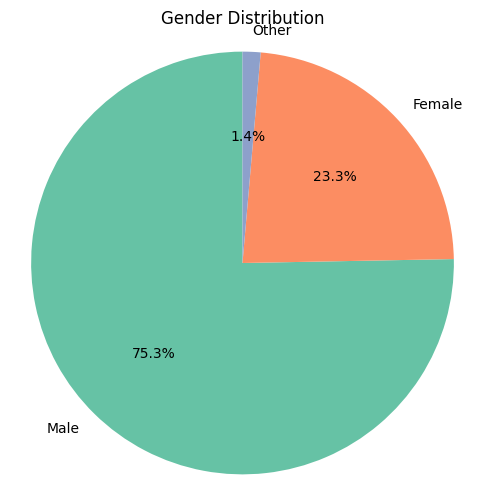

In [ ]:
if 'member_gender' in df.columns:
    gender_counts = df['member_gender'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title('Gender Distribution')
    plt.axis('equal')
plt.show()